In [1]:
import pickle 
import numpy as np 
import pandas as pd 
import pingouin as pg 
from scipy.special import softmax 

from IPython.display import clear_output
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns 

import sys
sys.path.append('..')
from utils.fit import fit_bms
from utils.viz import viz 
from utils.model import *
viz.get_style()

[-4.818347448456217, 4.678765823290675]
[-1.056500477512195, 5.061119943908933]
[-30.427818981020145, 30.705649472720765]


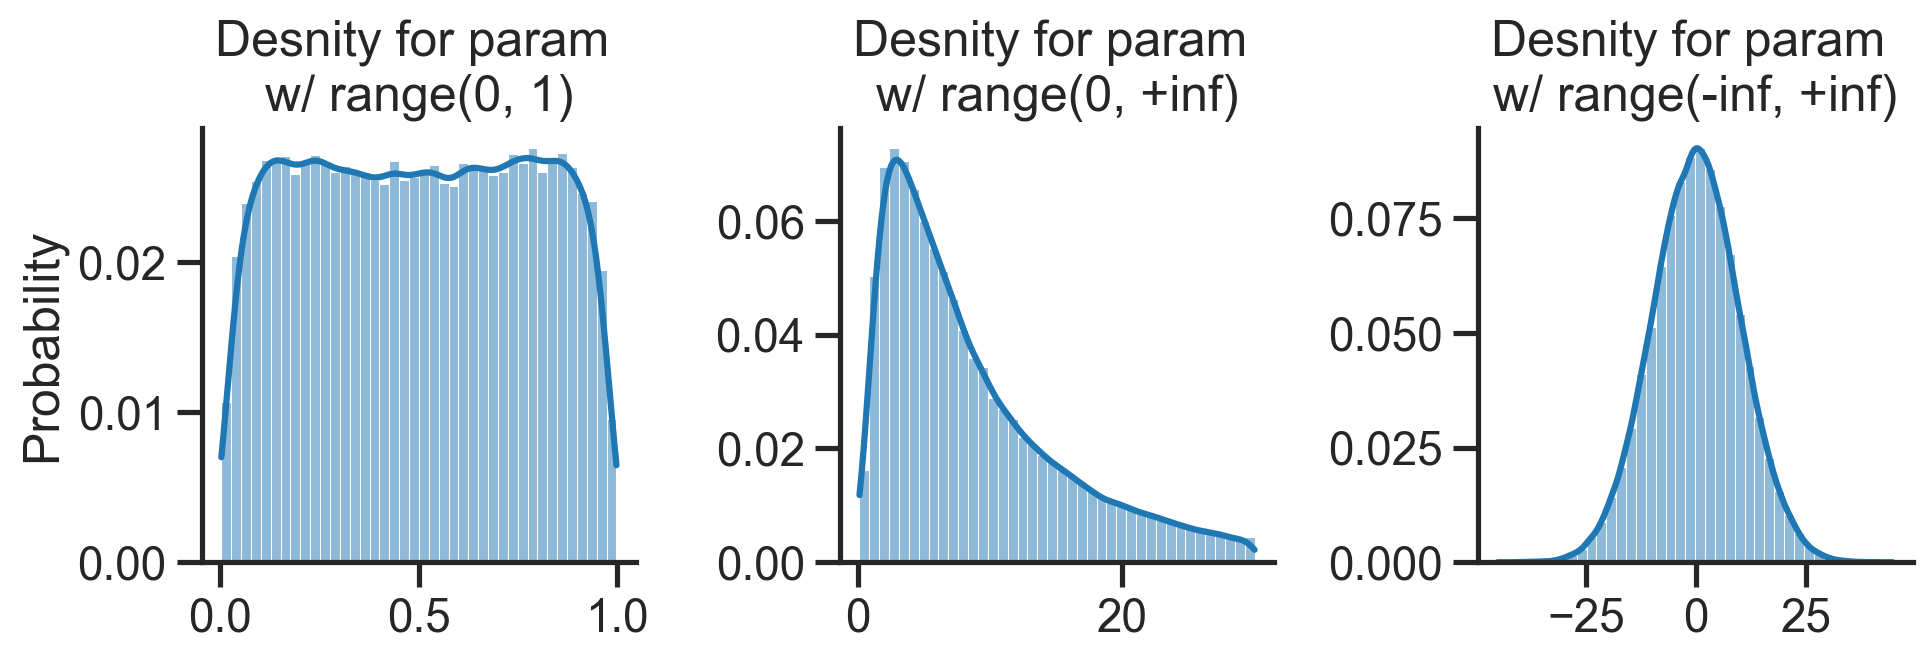

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3.6))
p_priors = [norm(0, 1.55), norm(2, 1), norm(0, 10)]  
p_trans  = [lambda x: 1/(1+np.exp(-x)),
            lambda x: np.exp(x),
            lambda x: x,]
titles = ['Desnity for param \nw/ range(0, 1)',
          'Desnity for param \nw/ range(0, +inf)',
          'Desnity for param \nw/ range(-inf, +inf)']
for i in range(3):
    ax = axs[i]
    prior = p_priors[i]
    trans = p_trans[i]
    y = prior.rvs(100000)
    print(f'[{np.quantile(y, .001)}, {np.quantile(y, .999)}]')
    x = trans(y)
    if i==1: x=x[x<30]
    sns.histplot(x, bins=40, kde=True, stat='probability', ax=ax)
    ax.set_ylabel('Probability') if i==0 else ax.set_ylabel('')
    ax.set_title(titles[i])
    ax.set_box_aspect(.85)
fig.tight_layout()
plt.savefig('../figures/FigS2_priors.pdf', dpi=300)